# Table of contents 
- [Replicability](#replicability)
- [Libraries](#libraries) 
- [Ground truth](#groundtruth) 
    - [Ten random articles from ten random volumes](#tenrandomarticlesfromtenrandomvolumes) 
    - [Manual extraction](#manualextraction)
    - [Investigation](#investigation)
        - [Statistics](#statistics) 
        - [Sections](#sections)
        - [Section title patterns](#sectiontitlepatterns)
        - [Links](#links)
        - [No links](#nolinks)
    - [Main observations](#mainobservations) 
- [References](#references)
<br>
<br>

<a name='replicability'></a>
## 0. Replicability
The numbers I achieved upon running this notebook the first time cannot be replicated, as I forgot to set a seed number to save the state of the random function. As such, this notebook will not generate the same random numbers, but I made sure to write the numbers that I achieved. 
<br>
<br>

<a name='libraries'></a>
## 1. Libraries 

In [26]:
import pandas as pd 
import numpy as np 

import csv 
import os 

import random as rand 
import re 

# Matplotlib for visualisations (Hunter 2007)
import matplotlib.pyplot as plt

<a name='groundtruth'></a>
## 2. Ground truth

To establish a ground truth about the articles and where the datasets are mentioned in them, I pick ten randomly selected articles from ten randomly selected volumes. 

I have adapted and edited an annotation scheme by Sourget (2023). I will go through each of the ten articles and make note of which datasets are mentioned. For each dataset used for analysis/experimentation/etc, I will write the following: 

| Column title         | Description                                                        |
|----------------------|--------------------------------------------------------------------|
| title [str]          | The title of the article                                           |
| DOI [str]            | The article's DOI                                                  |
| article_type [str]   | The type of article; defined by how it uses the dataset            |
|                      | - **Presenting**: The dataset is presented and described.          |
|                      | - **Analysing**: The dataset is used for analysis, modeling or, experimenting.                                                                              |
|                      | - **Discussing**: The dataset is used for discussion.              |
|                      | - **Mention**: The dataset is mentioned, e.g., as an example.      |
|                      | - **Other**: The dataset is used in a different way besides the four aforementioned (presenting, modeling, discussing, mention).                                 |
|                      | - **N/A**: The article does not use (a) dataset(s) in any of the aforementioned ways.                                                                        |
| dataset_used [str]   | The title of the dataset used. If there is no title:               |
|                      | - **Self-collected**: I will write 'Self-collected' if there is a description of patient selection, inclusion criteria, or similar.                           |
|                      | - **Author(s)**: I will write the name(s) of the author(s) if there are mentions of the author(s) whose dataset(s) have been used for analysis etc.             |
|                      | - **Processed**: I will write 'Processed' if the data used for analysis is a collection of data from multiple places.                                      |
|                      | - **N/A** I will write 'N/A' if there is no information about the dataset, or if the article does not use a dataset.                                          |
| dataset_link [str]   | The link to the dataset (if there is one). If there is/are:        |
|                      | - **Multiple variations** of the dataset-link, e.g., 'marmosetbrainconnectome.org' and 'marmosetbrainconnectome.org/download.html', I will include the less specific link, which, in this example, is the first. |
|                      | - **DOI**, e.g., "Raw EEG data from all healthy individuals, as well as Matlab code, are publicly available on zenodo.org (doi:10.5281/zenodo.6110595).", I will include the DOI. |
|                      | - **N/A** if there is no link. If there is a title, but no link, I will still write 'N/A'.                                                                     |
| reference [str]      | The citation of the dataset (or the article introducing the dataset), as it's in the article's references. 'N/A' if there is no mention in the references.                                                                                 |
| inline_mention [bool]       | True if the name of the dataset or the link to the dataset is mentioned in the article's body.                                                            |
| footnote_mention [bool]     | True if the name of the dataset or the link to the dataset is in one of the article's footnotes.                                                          |
| description_mention [bool]  | True if the name of the dataset or the link to the dataset is in one of the article's figure or table descriptions.                                       |
| dataset_section [list]  | List noting the title of the section(s) of the article in which the dataset is mentioned. E.g., [abstract, figure description, footnote]. I include the line of titles, e.g., if the dataset is mentioned in section 2.1, that is located within section 2., I will mention both ['2. Methods', '2.1. Participants']                                 |
| link_section [list]  | List noting the title of the section(s) of the article in which the link to the dataset is mentioned. E.g., [abstract, figure description, footnote]            |


<br>
<br>

<a name='tenrandomarticlesfromtenrandomvolumes'></a>
### 2.1. Ten random articles from ten random volumes 

In [2]:
randomlist = []
for i in range(0, 10):
    n = rand.randint(246, 264)
    randomlist.append(n)
print(randomlist)

[256, 246, 251, 246, 246, 247, 257, 261, 252, 249]


For each of the ten volumes [248, 249, 252, 253, 256, 259, 261, 262, 263, 264], I will generate a random number representing which article to use. However, the random number is dependent on the number of available articles in each volume. 

In [3]:
# The number of articles in each journal
journal_volumes = {
    248: 14,
    249: 35,
    252: 30,
    253: 37,
    256: 43,
    259: 33,
    261: 25,
    262: 33,
    263: 77,
    264: 94
}

In [4]:
# Function to pick a random article for each journal
def pick_random_article(journal_volumes):
    """This function iterates through each volumes and uses random.randint(1,num_articles)
    to pick a random article number for each volume within the range of available articles. 
    
    Parameters:
    :param journal_volumes: dictionary where the keys are the journal volumes, and the values are the number of articles in each journal.
    """
    for volume, num_articles in journal_volumes.items():
        random_article = rand.randint(1, num_articles)  # Generate a random number
        print(f'Volume {volume}, article {random_article}')

# Call the function to pick random articles
pick_random_article(journal_volumes)

Volume 248, article 10
Volume 249, article 20
Volume 252, article 4
Volume 253, article 21
Volume 256, article 1
Volume 259, article 6
Volume 261, article 9
Volume 262, article 17
Volume 263, article 34
Volume 264, article 73


I got the following results: 
- Volume 248, article 5
- Volume 249, article 3
- Volume 252, article 13
- Volume 253, article 19
- Volume 256, article 34
- Volume 259, article 30
- Volume 261, article 16
- Volume 262, article 3
- Volume 263, article 46
- Volume 264, article 7
<br>
<br>

<a name='manualextraction'></a>
### 2.2. Manual extraction 
I will now investigate each of the aforementioned ten articles and take note of the title, DOI, dataset used, if there is a link to the dataset, if the dataset is mentioned in the references, in the dataset is mentioned in the text, in a footnote, in any figure or table descriptions, and in which sections these mentions happen. 

In [5]:
# Create an empty DataFrame
articles = pd.DataFrame(columns=[
    'title',
    'DOI',
    'dataset_used',
    'dataset_link',
    'references_mention', 
    'inline_mention',
    'footnote_mention',
    'description_mention',
    'section'
])

In [6]:
# List of dictionaries representing article data
# The 'NHST statistics' is related to the investigation by Szucs et al. (2020)
article_data_list = [
    {
        'title': 'Motor impairment evoked by direct electrical stimulation of human parietal cortex during object manipulation',
        'DOI': '10.1016/j.neuroimage.2021.118839',
        'article_type': 'Analysing',
        'dataset_used': 'Self-collected',
        'dataset_link': 'N/A',
        'reference': 'N/A',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': False,
        'dataset_section': ['2. Materials and methods', '2.1. Patient selection and inclusion criteria'],
        'link_section': [],
        'NHST statistics': True # contains: ANOVA, p <
    },
    {
        'title': 'A hierarchical Bayesian model to find brain-behaviour associations in incomplete data sets',
        'DOI': '10.1016/j.neuroimage.2021.118854',
        'article_type': 'Analysing',
        'dataset_used': 'Human Connectome Project',
        'dataset_link': 'https://www.humanconnectome.org/study/hcp-young-adult/data-releases',
        'reference': 'N/A',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': False,
        'dataset_section': ['Abstract', '1. Introduction', '2. Materials and methods', '2.4. Experiments', '2.4.2. HCP Data', '2.5. Data and code availability', '3. Results', '3.2. HCP Data', '4. Discussion', '5. Conclusions', 'Research data for this article'],
        'link_section': ['2.4.2. HCP Data', '2.5. Data and code availability'],
        'NHST statistics': False # does not contain 
    },
    {
        'title': 'A hierarchical Bayesian model to find brain-behaviour associations in incomplete data sets',
        'DOI': '10.1016/j.neuroimage.2021.118854',
        'article_type': 'Analysing',
        'dataset_used': 'Synthetic data',
        'dataset_link': 'N/A',
        'reference': 'N/A',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': False,
        'dataset_section': ['Abstract', '1. Introduction', '2. Materials and methods', '2.4. Experiments', '2.4.1. Synthetic data', '2.5. Data and code availability', '3. Results', '3.1. Synthethic data', 'Research data for this article'],
        'link_section': [''], 
        'NHST statistics': False # does not contain 
    },
    {
        'title': 'An open access resource for functional brain connectivity from fully awake marmosets',
        'DOI': '10.1016/j.neuroimage.2022.119030',
        'article_type': 'Presenting',
        'dataset_used': 'Marmoset Functional Brain Connectivity Resource',
        'dataset_link': 'marmosetbrainconnectome.org',
        'reference': 'N/A',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': True,
        'dataset_section': ['Abstract', '1. Introduction', '2. Methods', '2.1. Animals', '3. Results', '3.1. Resource', '4. Discussion', 'Schaeffer data availability statement'],
        'link_section': ['Abstract', '1. Introduction', '2.9. 25 µm marmoset brain connectome anatomical template', 'Fig.', '3. Results', '3.1. Resource', '4. Discussion', 'Schaeffer data availability statement'],
        'NHST statistics': True # contains: p <
    }, 
    {
        'title': 'An open access resource for functional brain connectivity from fully awake marmosets',
        'DOI': '10.1016/j.neuroimage.2022.119030',
        'article_type': 'Analysing',
        'dataset_used': 'marmosetbrain.org',
        'dataset_link': 'marmosetbrain.org',
        'reference': 'P. Majka, et al. (2020). Open access resource for cellular-resolution analyses of corticocortical connectivity in the marmoset monkey',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': True,
        'dataset_section': ['2. Methods', '2.8. Cross-modality comparisons', '3. Results', '3.7. Comparison with tracer-based cellular connectivity', '4. Discussion'],
        'link_section': ['2.8. Cross-modality comparisons', '3.7. Comparison with tracer-based cellular connectivity', 'Fig. ', 'Discussion'], 
        'NHST statistics': True # contains: p <
    },
    {
        'title': 'Non-invasive recording of high-frequency signals from the human spinal cord',
        'DOI': '10.1016/j.neuroimage.2022.119050',
        'article_type': 'Analysing',
        'dataset_used': 'Self-collected',
        'dataset_link': '10.5281/zenodo.6110595',
        'reference': 'N/A',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': False,
        'dataset_section': ['2. Materials and methods', '2.1. Subjects', 'Data and code availability'],
        'link_section': ['2.5. Data and code availability', 'Data and code availability'],
        'NHST statistics': True # contains: ANOVA, t-test, p <
    },
    {
        'title': 'White matter properties underlying reading abilities differ in 8-year-old children born full term and preterm: A multi-modal approach',
        'DOI': '10.1016/j.neuroimage.2022.119240',
        'article_type': 'Analysing',
        'dataset_used': 'Self-collected',
        'dataset_link': 'N/A',
        'reference': 'N/A',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': True,
        'dataset_section': ['Abstract', '1. Introduction', '2. Materials and methods', '2.1. Participants', 'Data availability statement'],
        'link_section': ['Data availability statement'],
        'NHST statistics': True # contains: t-tests, p <, 
    },
    {
        'title': 'Bring a map when exploring the ERP data processing multiverse: A commentary on Clayson et al. 2021',
        'DOI': '10.1016/j.neuroimage.2022.119443',
        'article_type': 'Analysing',
        'dataset_used': 'Feuerriegel et al. (2021a)',
        'dataset_link': 'osf.io/gazx2/',
        'reference': 'D.C. Feuerriegel, et al. (2021) Electrophysiological correlates of confidence differ across correct and erroneous perceptual decisions',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': True,
        'dataset_section': ['1. Accounting for bias in multiverse analyses', 'Data and code availability statement'],
        'link_section': ['Data and code availability statement'],
        'NHST statistics': False # does not contain 
    },
    {
        'title': 'Bring a map when exploring the ERP data processing multiverse: A commentary on Clayson et al. 2021',
        'DOI': '10.1016/j.neuroimage.2022.119443',
        'article_type': 'Analysing',
        'dataset_used': 'Feuerriegel et al. (2021b)',
        'dataset_link': 'osf.io/eucqf/',
        'reference': 'D. Feuerriegel et al. (2021). Tracking dynamic adjustments to decision making and performance monitoring processes in conflict tasks',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': True,
        'dataset_section': ['1. Accounting for bias in multiverse analyses', 'Data and code availability statement'],
        'link_section': ['Data and code availability statement'],
        'NHST statistics': False # does not contain 
    },
    {
        'title': 'Bring a map when exploring the ERP data processing multiverse: A commentary on Clayson et al. 2021',
        'DOI': '10.1016/j.neuroimage.2022.119443',
        'article_type': 'Analysing',
        'dataset_used': 'Kappenman et al. (2021)',
        'dataset_link': 'osf.io/thsqg/',
        'reference': 'E.S. Kappenman et al. (2021) ERP CORE: An open resource for human event-related potential research',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': True,
        'dataset_section': ['1. Accounting for bias in multiverse analyses', 'Data and code availability statement'],
        'link_section': ['Data and code availability statement'],
        'NHST statistics': False # does not contain 
    },
    {
        'title': 'Bring a map when exploring the ERP data processing multiverse: A commentary on Clayson et al. 2021',
        'DOI': '10.1016/j.neuroimage.2022.119443',
        'article_type': 'Analysing',
        'dataset_used': 'Bode and Stahl (2014)',
        'dataset_link': 'osf.io/bndjg/',
        'reference': 'S. Bode and J. Stahl (2014). Predicting errors from patterns of event-related potentials preceding an overt response',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': True,
        'dataset_section': ['1. Accounting for bias in multiverse analyses', 'Data and code availability statement'],
        'link_section': ['Data and code availability statement'],
        'NHST statistics': False # does not contain 
    },
    {
        'title': 'Bring a map when exploring the ERP data processing multiverse: A commentary on Clayson et al. 2021',
        'DOI': '10.1016/j.neuroimage.2022.119443',
        'article_type': 'Analysing',
        'dataset_used': 'N/A',
        'dataset_link': 'osf.io/guwnm/',
        'reference': 'N/A',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': False,
        'dataset_section': ['1. Accounting for bias in multiverse analyses', 'Data and code availability statement'],
        'link_section': ['Data and code availability statement'],
        'NHST statistics': False # does not contain 
    },
    {
        'title': 'A dynamic gradient architecture generates brain activity states',
        'DOI': '10.1016/j.neuroimage.2022.119526',
        'article_type': 'Analysing',
        'dataset_used': 'Human Connectome Project',
        'dataset_link': 'https://db.humanconnectome.org/data/projects/HCP_1200',
        'reference': 'D.M. Barch et al. (2013). Function in the human connectome: Task-fMRI and individual differences in behavior',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': False,
        'dataset_section': ['1. Introduction', '2. Materials and methods', '2.1. Subjects and data', '5. Conclusion', 'Data and code availability'],
        'link_section': ['2. Materials and methods', '2.1. Subjects and data', '2.5. Task fMRI analysis'],
        'NHST statistics': True # contains: t-tests, p <
    },
    {
        'title': 'A dynamic gradient architecture generates brain activity states',
        'DOI': '10.1016/j.neuroimage.2022.119526',
        'article_type': 'Analysing',
        'dataset_used': 'Allen Human Brain Atlas',
        'dataset_link': 'http://human.brain-map.org/',
        'reference': 'N/A',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': False,
        'dataset_section': ['2.6. Genetic spatial correlation', '3.2. Correspondence with spatial gene expression patterns', 'Data and code availability'],
        'link_section': ['Data and code availability'],
        'NHST statistics': True # contains: t-tests, p <
    },
    {
        'title': 'A dynamic gradient architecture generates brain activity states',
        'DOI': '10.1016/j.neuroimage.2022.119526',
        'article_type': 'Analysing',
        'dataset_used': 'Brainnetome atlas',
        'dataset_link': 'http://www.brainnetome.org/',
        'reference': 'L. Fan et al. (2016). The human brainnetome atlas: a new brain atlas based on connectional architecture',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': False,
        'dataset_section': ['2.3. Gradient analysis and reproducibility', '2.6. Genetic spatial correlation'],
        'link_section': ['2.3. Gradient analysis and reproducibility'],
        'NHST statistics': True # contains: t-tests, p <
    },
    {
        'title': 'A dynamic gradient architecture generates brain activity states',
        'DOI': '10.1016/j.neuroimage.2022.119526',
        'article_type': 'Analysing',
        'dataset_used': 'SUIT atlas',
        'dataset_link': 'http://www.diedrichsenlab.org/imaging/suit.htm',
        'reference': 'J. Diedrichsen (2006). A spatially unbiased atlas template of the human cerebellum',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': False,
        'dataset_section': ['2.3. Gradient analysis and reproducibility', '2.6. Genetic spatial correlation'],
        'link_section': ['2.3. Gradient analysis and reproducibility'],
        'NHST statistics': True # contains: t-tests, p <
    },
    {
        'title': 'A dynamic gradient architecture generates brain activity states',
        'DOI': '10.1016/j.neuroimage.2022.119526',
        'article_type': 'Analysing',
        'dataset_used': 'Processed',
        'dataset_link': 'https://github.com/jbrown81/gradients',
        'reference': 'N/A',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': False,
        'dataset_section': ['Data and code availability'],
        'link_section': ['Data and code availability'],
        'NHST statistics': True # contains: t-tests, p <
    },
    {
        'title': 'Multisensory integration of anticipated cardiac signals with visual targets affects their detection among multiple visual stimuli',
        'DOI': '10.1016/j.neuroimage.2022.119549',
        'article_type': 'Analysing',
        'dataset_used': 'Self-collected',
        'dataset_link': 'N/A',
        'reference': 'N/A',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': False,
        'dataset_section': ['2. Materials and methods', '2.1. Participants', 'Data availability'],
        'link_section': [],
        'NHST statistics': True # contains: t-test, p < 
    },
    {
        'title': 'The neuroanatomy of pregnancy and postpartum',
        'DOI': '10.1016/j.neuroimage.2022.119646',
        'article_type': 'N/A',
        'dataset_used': 'N/A',
        'dataset_link': 'N/A',
        'reference': 'N/A',
        'inline_mention': False,
        'footnote_mention': False,
        'description_mention': False,
        'dataset_section': ['1. Introduction', '2. Applied methods'],
        'link_section': [],
        'NHST statistics': False # does not contain 
    },
    {
        'title': 'Keep the head in the right place: Face-body interactions in inferior temporal cortex',
        'DOI': '10.1016/j.neuroimage.2022.119676',
        'article_type': 'Analysing',
        'dataset_used': 'Self-collected',
        'dataset_link': 'https://osf.io/b8pfa/?view_only=b6dbb5dd6a044989a7eecdc99facb43c',
        'reference': 'N/A',
        'inline_mention': True,
        'footnote_mention': False,
        'description_mention': False,
        'dataset_section': ['2. Methods', '2.1. Subjects', 'Data Availability'],
        'link_section': ['Data Availability'],
        'NHST statistics': True # contains: ANOVA, t-test, p < 
    },
]

# Create the DataFrame from the list of dictionaries
articles = pd.DataFrame(article_data_list)

In [8]:
articles

,title,DOI,article_type,dataset_used,dataset_link,reference,inline_mention,footnote_mention,description_mention,dataset_section,link_section,NHST statistics
0,Motor impairment evoked by direct electrical s...,10.1016/j.neuroimage.2021.118839,Analysing,Self-collected,N/A,N/A,True,False,False,"[2. Materials and methods, 2.1. Patient select...",[],True
1,A hierarchical Bayesian model to find brain-be...,10.1016/j.neuroimage.2021.118854,Analysing,Human Connectome Project,https://www.humanconnectome.org/study/hcp-youn...,N/A,True,False,False,"[Abstract, 1. Introduction, 2. Materials and m...","[2.4.2. HCP Data, 2.5. Data and code availabil...",False
2,A hierarchical Bayesian model to find brain-be...,10.1016/j.neuroimage.2021.118854,Analysing,Synthetic data,N/A,N/A,True,False,False,"[Abstract, 1. Introduction, 2. Materials and m...",[],False
3,An open access resource for functional brain c...,10.1016/j.neuroimage.2022.119030,Presenting,Marmoset Functional Brain Connectivity Resource,marmosetbrainconnectome.org,N/A,True,False,True,"[Abstract, 1. Introduction, 2. Methods, 2.1. A...","[Abstract, 1. Introduction, 2.9. 25 µm marmose...",True
4,An open access resource for functional brain c...,10.1016/j.neuroimage.2022.119030,Analysing,marmosetbrain.org,marmosetbrain.org,"P. Majka, et al. (2020). Open access resource ...",True,False,True,"[2. Methods, 2.8. Cross-modality comparisons, ...","[2.8. Cross-modality comparisons, 3.7. Compari...",True
5,Non-invasive recording of high-frequency signa...,10.1016/j.neuroimage.2022.119050,Analysing,Self-collected,10.5281/zenodo.6110595,N/A,True,False,False,"[2. Materials and methods, 2.1. Subjects, Data...","[2.5. Data and code availability, Data and cod...",True
6,White matter properties underlying reading abi...,10.1016/j.neuroimage.2022.119240,Analysing,Self-collected,N/A,N/A,True,False,True,"[Abstract, 1. Introduction, 2. Materials and m...",[Data availability statement],True
7,Bring a map when exploring the ERP data proces...,10.1016/j.neuroimage.2022.119443,Analysing,Feuerriegel et al. (2021a),osf.io/gazx2/,"D.C. Feuerriegel, et al. (2021) Electrophysiol...",True,False,True,[1. Accounting for bias in multiverse analyses...,[Data and code availability statement],False
8,Bring a map when exploring the ERP data proces...,10.1016/j.neuroimage.2022.119443,Analysing,Feuerriegel et al. (2021b),osf.io/eucqf/,D. Feuerriegel et al. (2021). Tracking dynamic...,True,False,True,[1. Accounting for bias in multiverse analyses...,[Data and code availability statement],False
9,Bring a map when exploring the ERP data proces...,10.1016/j.neuroimage.2022.119443,Analysing,Kappenman et al. (2021),osf.io/thsqg/,E.S. Kappenman et al. (2021) ERP CORE: An open...,True,False,True,[1. Accounting for bias in multiverse analyses...,[Data and code availability statement],False


#### 2.2.1. Save to csv 

In [9]:
# Path to the 'Data' directory
data_dir = os.path.join(os.pardir, 'Data')

# File path
file_path = os.path.join(data_dir, 'articles_groundtruth.csv')

# Save the DataFrame to CSV, overwriting the file if it exists
articles.to_csv(file_path, index=False, mode='w')

<a name='investigation'></a>
### 2.3. Investigation 

The following is an investigation of where the dataset is mentioned. 
<br>
<br>

<a name='statistics'></a>
#### 2.3.1. Statistics 
I'm curious to see the distribution of how many datasets are mentioned per paper, how many have a link attached to it, how many are referenced in the references, and where the datasets in mentioned (if it's inline, in a footnote, or in a figure or table description). 

Findings: 
- Between 1 and 5 datasets are used in each article. 
- 40% of the datasets are listed in the references 
- 95% of the datasets are mentioned as a part of the article's main text. 
- 0% of the datasets are mentioned in footnotes. 
- 35% of the datasets are mentioned in a figure or table description. 

In [10]:
# The number of occurrences of each DOI is equal to the number of datasets mentioned in each article
doi_counts = articles['DOI'].value_counts()

10.1016/j.neuroimage.2022.119443    5
10.1016/j.neuroimage.2022.119526    5
10.1016/j.neuroimage.2021.118854    2
10.1016/j.neuroimage.2022.119030    2
10.1016/j.neuroimage.2021.118839    1
10.1016/j.neuroimage.2022.119050    1
10.1016/j.neuroimage.2022.119240    1
10.1016/j.neuroimage.2022.119549    1
10.1016/j.neuroimage.2022.119646    1
10.1016/j.neuroimage.2022.119676    1
Name: DOI, dtype: int64


In [11]:
total = sum(doi_counts)
print("Total number of datasets: ", total)

Total number of datasets:  20


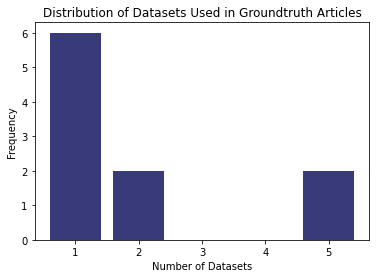

In [34]:
# Assuming you have a DataFrame named 'articles' with a column 'DOI'
doi_counts = articles['DOI'].value_counts()

# Convert doi_counts to a DataFrame
doi_counts_df = pd.DataFrame({'DOI': doi_counts.index, 'Count': doi_counts.values})

# Count the occurrences of each count
count_occurrences = doi_counts_df['Count'].value_counts().sort_index()

# Create a bar plot with tab20b colormap
fig, ax = plt.subplots()
bars = ax.bar(count_occurrences.index, count_occurrences, color=plt.cm.tab20b.colors[0])

# Set labels and title
plt.xlabel('Number of Datasets')
plt.ylabel('Frequency')
plt.title('Distribution of Datasets Used in Groundtruth Articles')

# Save the figure
plt.savefig('../Results/graphics/Groundtruth_DatasetUsedDistribution.png')

# Show the plot
plt.show()

In [12]:
# The percentage of articles mentioned in the references (reference != 'N/A'), 
# in the text (inline_mention = True), in a footnote (footnote_mention = True), 
# and in a figure or table description (description_mention = True) 

# References mention
references_mention = (articles['reference'] != 'N/A').sum()
percentage_with_references_mention = (references_mention / len(articles)) * 100

# In-text mention
intext_mention = (articles['inline_mention'] == True).sum()
percentage_with_inline_mention = (intext_mention / len(articles)) * 100

# Footnote_mention
infootnote_mention = (articles['footnote_mention'] == True).sum()
percentage_with_footnote_mention = (infootnote_mention / len(articles)) * 100

# Description_mention
indescription_mention = (articles['description_mention'] == True).sum()
percentage_with_description_mention = (indescription_mention / len(articles)) * 100

print(f"Percentage of articles mentioned in the references: {percentage_with_references_mention:.2f}%")
print(f"Percentage of articles mentioned in the text: {percentage_with_inline_mention:.2f}%")
print(f"Percentage of articles mentioned in a footnote: {percentage_with_footnote_mention:.2f}%")
print(f"Percentage of articles mentioned in a description: {percentage_with_description_mention:.2f}%")

Percentage of articles mentioned in the references: 40.00%
Percentage of articles mentioned in the text: 95.00%
Percentage of articles mentioned in a footnote: 0.00%
Percentage of articles mentioned in a description: 35.00%


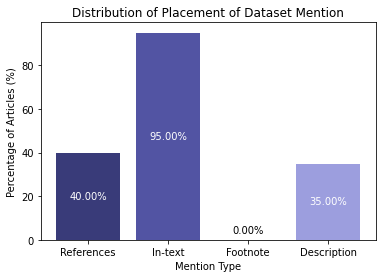

In [41]:
# Data preparation
mention_types = ['References', 'In-text', 'Footnote', 'Description']
percentages = [percentage_with_references_mention, 
               percentage_with_inline_mention, 
               percentage_with_footnote_mention, 
               percentage_with_description_mention]

# Create a bar plot
bars = plt.bar(mention_types, percentages, color=plt.cm.tab20b.colors[:len(mention_types)])

# Add percentage labels inside or above the bars
for bar, percentage in zip(bars, percentages):
    if percentage < 10:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
                 f'{percentage:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
                 f'{percentage:.2f}%', ha='center', va='center', color='white', fontsize=10)

# Set labels and title
plt.xlabel('Mention Type')
plt.ylabel('Percentage of Articles (%)')
plt.title('Distribution of Placement of Dataset Mention')

# Save the figure
plt.savefig('../Results/graphics/Groundtruth_DatasetPlacementDistribution.png')

# Show the plot
plt.show()

<a name='sections'></a>
#### 2.3.2. Sections 
I want to get an overview of where the datasets are typically mentioned, i.e., in which section is the data mentioned. 

In [13]:
# Explode the 'section' column to split the lists into separate rows
exploded_sections = articles.explode('dataset_section')

# Count the occurrences of each section
section_counts = exploded_sections['dataset_section'].value_counts().reset_index()
section_counts.columns = ['Section', 'Frequency']

# Print the section frequency overview
print("Frequency of dataset mentions in each section:")
print(section_counts)

Frequency of dataset mentions in each section:
                                              Section  Frequency
0                            2. Materials and methods          7
1                                     1. Introduction          6
2       1. Accounting for bias in multiverse analyses          5
3                Data and code availability statement          5
4                                          3. Results          4
5                          Data and code availability          4
6                                            Abstract          4
7                                       4. Discussion          3
8                    2.6. Genetic spatial correlation          3
9                                          2. Methods          3
10                    2.5. Data and code availability          2
11         2.3. Gradient analysis and reproducibility          2
12                                  2.1. Participants          2
13                                   2.4. E

In [14]:
section_mentions = sum(section_counts['Frequency'])

In [15]:
section_mentions

74

Based on the section names and frequencies aboved, I can see that some sections can be grouped together for a clearer view. This includes mentions of the word 'method', 'availability', and 'subject/participant/selection'. I define some simple regex patterns to group the section names and see if this makes the overview clearer. 

In [16]:
# Define regex patterns for keyword matching
patterns = {
    'Method': r'method',
    'Availability': r'\w*\s*availability\s*\w*',
    'Subject or Participant or Selection': r'subject|participant|selection',
    'Abstract': r'abstract',
    'Introduction': r'introduction',
    'Conclusion': r'conclusion',
    'Results': r'results',
    'Discussion': r'discussion',
    'Other': r''  # Initialize 'Other' as an empty pattern
}

In [17]:
# Dictionary to store frequencies and matched sections
frequencies = {}
matched_sections = {category: set() for category in patterns.keys()}

# Iterate through the list of sections
for sections in articles['dataset_section']:
    # Create a set to keep track of processed categories for this dataset
    processed_categories = set()
    
    for section in sections:
        #processed_categories = set()  # Reset processed_categories for each section title 
        matched = False

        # Iterate through patterns and check for matches
        for category, pattern in patterns.items():
            if category not in processed_categories and re.search(pattern, section, flags=re.IGNORECASE):
                matched_sections[category].add(section)
                frequencies[category] = frequencies.get(category, 0) + 1
                processed_categories.add(category)  # Mark category as processed for this dataset
                matched = True
                break

        # If no match was found, consider it as "Other"
        if not matched:
            matched_sections['Other'].add(section)

# Convert frequencies to a DataFrame
section_df = pd.DataFrame(list(frequencies.items()), columns=['Category', 'Frequency'])

# Append the matched sections to the DataFrame
section_df['Matched Sections'] = [', '.join(matched_sections[category]) for category in section_df['Category']]

# Order the sections by their frequency
section_df = section_df.sort_values(by='Frequency', ascending=False)

In [18]:
print("Number of unique section titles:", len(section_counts))

Number of unique section titles: 34


In [19]:
section_df

,Category,Frequency,Matched Sections
5,Availability,15,"Data availability, Schaeffer data availability..."
4,Other,12,"Research data for this article, 2.6. Genetic s..."
0,Method,11,"2. Methods, 2. Materials and methods, 2. Appli..."
1,Subject or Participant or Selection,6,"2.1. Subjects and data, 2.1. Participants, 2.1..."
3,Introduction,6,1. Introduction
2,Abstract,4,Abstract
6,Results,4,3. Results
7,Discussion,3,4. Discussion
8,Conclusion,2,"5. Conclusions, 5. Conclusion"


In [20]:
section_df['Matched Sections'].loc[0]

'2. Methods, 2. Materials and methods, 2. Applied methods'

In [21]:
section_df['Matched Sections'].loc[1]

'2.1. Subjects and data, 2.1. Participants, 2.1. Subjects, 2.1. Patient selection and inclusion criteria'

In [22]:
section_df['Matched Sections'].loc[4]

'Research data for this article, 2.6. Genetic spatial correlation, 3.7. Comparison with tracer-based cellular connectivity, 3.1. Resource, 3.2. Correspondence with spatial gene expression patterns, 3.1. Synthethic data, 2.1. Animals, 2.3. Gradient analysis and reproducibility, 2.4.2. HCP Data, 1. Accounting for bias in multiverse analyses, 2.8. Cross-modality comparisons, 2.4.1. Synthetic data, 3.2. HCP Data, 2.4. Experiments'

There are a total of 34 unique section titles. 
- 15 datasets are mentioned in a section containing the word ‘availability’.
- 11 datasets are mentioned in a section containing the word 'method' - 6 of the titles contain to the subgroup that contains the 'participant', 'subject' or 'selection'. 
- 12 datasets were mentioned in sections with unique titles (see the variable "matching_rows['dataset_section']" further down). Out of these 12, only 2 datasets are mentioned in sections with unique titles and nowhere else in the articles. 

More than half of the datasets are mentioned in sections with unique titles, and I'm curious to see what these titles are: 

In [23]:
section_df['Matched Sections'].loc[4]

'Research data for this article, 2.6. Genetic spatial correlation, 3.7. Comparison with tracer-based cellular connectivity, 3.1. Resource, 3.2. Correspondence with spatial gene expression patterns, 3.1. Synthethic data, 2.1. Animals, 2.3. Gradient analysis and reproducibility, 2.4.2. HCP Data, 1. Accounting for bias in multiverse analyses, 2.8. Cross-modality comparisons, 2.4.1. Synthetic data, 3.2. HCP Data, 2.4. Experiments'

These section names are quite unique. Based on the numbering in the names alone, I can make some assumptions about what they might be related to: 
- "2.1. Animals" could be captured by the category 'subject/participant/selection', as the section describes the animals used for the imaging. 
- The sections starting with the number '2' (i.e., 2.1., 2.3., 2.4., 2.4.1., 2.4.2., 2.6., 2.8.) could be captured by the category 'method', as the second section in almost all of the articles is the methodology section. 
- The sections starting with the number '3' (i.e., 3.1., 3.2., 3.7.) could be captured by the category 'results', as the third section in almost all of the articles is the results section - however, this section has also been called 'analysis' or something else. 
- The sections called 'Research data for this article' might be similar to 'Data availability'. 
<br>
<br> 

Instead of making assumptions about which categories the sections captured by the 'Other' category could belong to, I'm going to see if the articles contains any other sections that I'm more confident about. 

In [24]:
# Section_df['Matched Sections'].loc[4] contains the string of unique titles
titles_to_match = section_df['Matched Sections'].loc[4].split(', ')  # Split the string into a list of titles

# Boolean mask to select all rows that contains a unique title 
mask = articles['dataset_section'].apply(lambda x: any(title in x for title in titles_to_match))

# Use the mask to filter the rows - matching_rows contains the rows from articles 
# that have titles matching any of the titles in titles_to_match
matching_rows = articles[mask]

In [25]:
#matching_rows[['DOI', 'dataset_used', 'dataset_section']]
matching_rows['dataset_section'].values

array([list(['Abstract', '1. Introduction', '2. Materials and methods', '2.4. Experiments', '2.4.2. HCP Data', '2.5. Data and code availability', '3. Results', '3.2. HCP Data', '4. Discussion', '5. Conclusions', 'Research data for this article']),
       list(['Abstract', '1. Introduction', '2. Materials and methods', '2.4. Experiments', '2.4.1. Synthetic data', '2.5. Data and code availability', '3. Results', '3.1. Synthethic data', 'Research data for this article']),
       list(['Abstract', '1. Introduction', '2. Methods', '2.1. Animals', '3. Results', '3.1. Resource', '4. Discussion', 'Schaeffer data availability statement']),
       list(['2. Methods', '2.8. Cross-modality comparisons', '3. Results', '3.7. Comparison with tracer-based cellular connectivity', '4. Discussion']),
       list(['1. Accounting for bias in multiverse analyses', 'Data and code availability statement']),
       list(['1. Accounting for bias in multiverse analyses', 'Data and code availability statement']),

Looking at the articles and the section-names of where the datasets are mentioned, most of the datasets are captured by the categories I defined above, with the exception of two datasets that appear to only be mentioned in sections with quite unique names ('2.3. Gradient analysis and reproducibility', '2.6. Genetic spatial correlation'). 
<br>
<br>

Based on this investigation, there are four main areas in the articles that I need to pay special attention to when attempting to extract the datasets, namely: 
* The **methods** section (typically titled '2.' and contains a variation of 'method')
    * A special subection within the methods is **subject**/**participant**/**selection**
* The **introduction** (typically titled '1.')
* The **availability** section (typically titled without a number and contains the word 'availability') 
* Regarding the **other** category, I saw that a majority of the datasets were mentioned in sections with titles that I had other categories for. The variability of section titles is difficult to deal with, and the downfall of using the limited list of categories used above is that I will miss some datasets. 
<br>
<br>

<a name='sectiontitlepatterns'></a>
#### 2.3.3. Section title patterns 
By reading the titles printed above, it seems like most are stylized so that only the first word is capitalized and the rest of the words are in lower case. I want to see if this is the case for all section titles. 

In [25]:
print(exploded_sections['dataset_section'].unique())

['2. Materials and methods'
 '2.1. Patient selection and inclusion criteria' 'Abstract'
 '1. Introduction' '2.4. Experiments' '2.4.2. HCP Data'
 '2.5. Data and code availability' '3. Results' '3.2. HCP Data'
 '4. Discussion' '5. Conclusions' 'Research data for this article'
 '2.4.1. Synthetic data' '3.1. Synthethic data' '2. Methods'
 '2.1. Animals' '3.1. Resource' 'Schaeffer data availability statement'
 '2.8. Cross-modality comparisons'
 '3.7. Comparison with tracer-based cellular connectivity' '2.1. Subjects'
 'Data and code availability' '2.1. Participants'
 'Data availability statement'
 '1. Accounting for bias in multiverse analyses'
 'Data and code availability statement' '2.1. Subjects and data'
 '5. Conclusion' '2.6. Genetic spatial correlation'
 '3.2. Correspondence with spatial gene expression patterns'
 '2.3. Gradient analysis and reproducibility' 'Data availability'
 '2. Applied methods' 'Data Availability']


In [26]:
def get_nonmatching_section_titles(text_list):
    """This function processes a list of text strings to see if, for all strings 
    - The first word is capitalized 
    - The first word is the only capitalized word 
    e.g., "Introduction" is considered to follow the pattern, as the string starts with an uppercase
    letter followed by lowercase letters. Another title that follows the pattern is "Data and code 
    availability", whereas "Data and Code Availability" does not follow the pattern. 
    The function was designed to assist in identifying section titles that deviate from the expected format. 
    
    Paramters: 
    :param text_list (list): A list of text strings to be checked for conformity to the pattern.
    
    Returns: 
    :returns non_matching_strings (list): A list of text strings from text_list that do not follow the specified pattern.
    """ 
    non_matching_strings = []  # Initialize a list to store non-matching strings
    for text in text_list:
        words = text.split('. ', 1)  # Split at the first period and space
        if len(words) == 2:
            first_word, rest_of_text = words
            first_word_parts = first_word.split('.')
            if all(part.isdigit() for part in first_word_parts) | first_word.isdigit():
                if rest_of_text[0].isupper() and rest_of_text[1:].islower():
                    continue  # The pattern is followed
        elif text[0].isupper() and text[1:].islower():
            continue  # The pattern is followed
        else:
            parts = text.split('.')
            if len(parts) >= 2 and all(part.isdigit() for part in parts):
                continue  # The pattern is followed
        non_matching_strings.append(text)  # Add non-matching strings to the list
    return non_matching_strings

In [27]:
# Check if all titles in follow the pattern
non_matching_strings = articles['dataset_section'].apply(get_nonmatching_section_titles)

# Flatten the list of non-matching strings
non_matching_strings = [string for sublist in non_matching_strings for string in sublist]

if len(non_matching_strings) == 0:
    print("All strings in dataset_section follow the pattern.")
else:
    print("Strings that do not follow the pattern:")
    for string in non_matching_strings:
        print(string)

Strings that do not follow the pattern:
2.4.2. HCP Data
3.2. HCP Data
Data Availability


From 34 unique section titles, only three deviated from the expected pattern of having only the first word in the title in uppercase and the rest of the words in lowercase. 
<br>
<br>

<a name='links'></a>
#### 2.3.4. Links
I'm interested to know the distribution of articles with and without links, as well as where the links are mentioned compared to any additional mentions of the dataset. 

In [43]:
# Calculate the percentage of articles with dataset links
has_links = (articles['dataset_link'] != 'N/A').sum()
percentage_with_links = (has_links / len(articles)) * 100

print(f"Percentage of articles with dataset links: {percentage_with_links:.2f}%")

Percentage of articles with dataset links: 75.00%


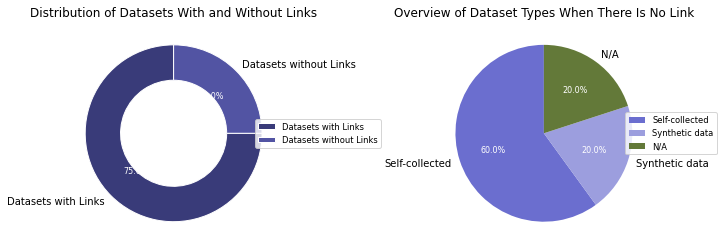

In [46]:
labels1 = ['Datasets with Links', 'Datasets without Links']
sizes1 = [percentage_with_links, 100 - percentage_with_links]

# Create a pie plot for datasets with and without links
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

wedges1, texts1, autotexts1 = ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%',
                                      startangle=90, colors=plt.cm.tab20b.colors[:2],
                                      wedgeprops=dict(width=0.4, edgecolor='w'))

# Add a legend
legend1 = ax1.legend(wedges1, labels1, loc='center left', bbox_to_anchor=(0.85, 0.5), fontsize='small')

# Add percentage labels outside the pie chart
for autotext in autotexts1:
    autotext.set(size=8, color='white')

# Filter rows where 'dataset_link' is 'N/A'
na_links = articles[articles['dataset_link'] == 'N/A']

# Get the counts of each type of dataset used
dataset_counts = na_links['dataset_used'].value_counts().reset_index()
dataset_counts.columns = ['Dataset Type', 'Count']

# Data preparation for dataset types when links are not available
labels2 = dataset_counts['Dataset Type']
sizes2 = dataset_counts['Count']

# Create a pie plot for dataset types when links are not available
wedges2, texts2, autotexts2 = ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
                                      startangle=90, colors=plt.cm.tab20b.colors[2:])

# Add a legend
legend2 = ax2.legend(wedges2, labels2, loc='center left', bbox_to_anchor=(0.85, 0.5), fontsize='small')

# Add percentage labels outside the pie chart
for autotext in autotexts2:
    autotext.set(size=8, color='white')

# Set titles
ax1.set_title('Distribution of Datasets With and Without Links')
ax2.set_title("Overview of Dataset Types When There Is No Link")

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('../Results/graphics/GroundtruthURLDistribution.png', bbox_extra_artists=(legend1, legend2), bbox_inches='tight')

# Show the plots
plt.show()

Similar to how I explored the titles of the sections wherein the datasets are mentioned, I want to explore the titles of the sections wherein the links are. 

In [29]:
articles['link_section']

0                                                    []
1     [2.4.2. HCP Data, 2.5. Data and code availabil...
2                                                    []
3     [Abstract, 1. Introduction, 2.9. 25 µm marmose...
4     [2.8. Cross-modality comparisons, 3.7. Compari...
5     [2.5. Data and code availability, Data and cod...
6                         [Data availability statement]
7                [Data and code availability statement]
8                [Data and code availability statement]
9                [Data and code availability statement]
10               [Data and code availability statement]
11               [Data and code availability statement]
12    [2. Materials and methods, 2.1. Subjects and d...
13                         [Data and code availability]
14         [2.3. Gradient analysis and reproducibility]
15         [2.3. Gradient analysis and reproducibility]
16                         [Data and code availability]
17                                              

In [30]:
# Dictionary to store frequencies and matched sections
link_frequencies = {}
link_matched_sections = {category: set() for category in patterns.keys()}

# Iterate through the list of sections
for sections in articles['link_section']:
    # Create a set to keep track of processed categories for this dataset
    processed_categories = set()
    
    for section in sections:
        # Skip empty sections
        if not section:
            continue

        processed_categories = set()  # Reset processed_categories for each section title 
        matched = False

        # Iterate through patterns and check for matches
        for category, pattern in patterns.items():
            if category not in processed_categories and re.search(pattern, section, flags=re.IGNORECASE):
                link_matched_sections[category].add(section)
                link_frequencies[category] = link_frequencies.get(category, 0) + 1
                processed_categories.add(category)  # Mark category as processed for this dataset
                matched = True
                break

        # If no match was found, consider it as "Other"
        if not matched:
            link_matched_sections['Other'].add(section)
            
# Convert frequencies to a DataFrame
link_section_df = pd.DataFrame(list(link_frequencies.items()), columns=['Category', 'Frequency'])

# Append the matched sections to the DataFrame
link_section_df['Matched Sections'] = [', '.join(link_matched_sections[category]) for category in link_section_df['Category']]

# Order the sections by their frequency
link_section_df = link_section_df.sort_values(by='Frequency', ascending=False)

In [31]:
link_section_df

,Category,Frequency,Matched Sections
1,Availability,13,"2.5. Data and code availability, Data availabi..."
0,Other,10,"Fig. , 2.9. 25 µm marmoset brain connectome an..."
5,Discussion,2,"Discussion, 4. Discussion"
2,Abstract,1,Abstract
3,Introduction,1,1. Introduction
4,Results,1,3. Results
6,Method,1,2. Materials and methods
7,Subject or Participant or Selection,1,2.1. Subjects and data


Just over half of the links to the datasets are mentioned in the section containing the word 'availability'. I'm curious to see the unique section titles: 

In [32]:
link_section_df[link_section_df['Category'] == 'Other'][['Matched Sections']].values

array([['Fig. , 2.9. 25 µm marmoset brain connectome anatomical template, 2.4.2. HCP Data, 2.5. Task fMRI analysis, 2.3. Gradient analysis and reproducibility, Fig., 3.7. Comparison with tracer-based cellular connectivity, 3.1. Resource, 2.8. Cross-modality comparisons']],
      dtype=object)

In [33]:
link_section_df['Matched Sections'].loc[0]

'Fig. , 2.9. 25 µm marmoset brain connectome anatomical template, 2.4.2. HCP Data, 2.5. Task fMRI analysis, 2.3. Gradient analysis and reproducibility, Fig., 3.7. Comparison with tracer-based cellular connectivity, 3.1. Resource, 2.8. Cross-modality comparisons'

In [34]:
# Section_df['Matched Sections'].loc[4] contains the string of unique titles
titles_to_match_links = link_section_df['Matched Sections'].loc[0].split(', ')  # Split the string into a list of titles

# Boolean mask to select all rows that contains a unique title 
mask = articles['link_section'].apply(lambda x: any(title in x for title in titles_to_match_links))

# Use the mask to filter the rows - matching_rows contains the rows from articles 
# that have titles matching any of the titles in titles_to_match
matching_rows_links = articles[mask]

In [35]:
matching_rows_links[['DOI', 'dataset_used', 'dataset_section']]

,DOI,dataset_used,dataset_section
1,10.1016/j.neuroimage.2021.118854,Human Connectome Project,"[Abstract, 1. Introduction, 2. Materials and m..."
3,10.1016/j.neuroimage.2022.119030,Marmoset Functional Brain Connectivity Resource,"[Abstract, 1. Introduction, 2. Methods, 2.1. A..."
4,10.1016/j.neuroimage.2022.119030,marmosetbrain.org,"[2. Methods, 2.8. Cross-modality comparisons, ..."
12,10.1016/j.neuroimage.2022.119526,Human Connectome Project,"[1. Introduction, 2. Materials and methods, 2...."
14,10.1016/j.neuroimage.2022.119526,Brainnetome atlas,"[2.3. Gradient analysis and reproducibility, 2..."
15,10.1016/j.neuroimage.2022.119526,SUIT atlas,"[2.3. Gradient analysis and reproducibility, 2..."


In [36]:
matching_rows_links['dataset_section'].values

array([list(['Abstract', '1. Introduction', '2. Materials and methods', '2.4. Experiments', '2.4.2. HCP Data', '2.5. Data and code availability', '3. Results', '3.2. HCP Data', '4. Discussion', '5. Conclusions', 'Research data for this article']),
       list(['Abstract', '1. Introduction', '2. Methods', '2.1. Animals', '3. Results', '3.1. Resource', '4. Discussion', 'Schaeffer data availability statement']),
       list(['2. Methods', '2.8. Cross-modality comparisons', '3. Results', '3.7. Comparison with tracer-based cellular connectivity', '4. Discussion']),
       list(['1. Introduction', '2. Materials and methods', '2.1. Subjects and data', '5. Conclusion', 'Data and code availability']),
       list(['2.3. Gradient analysis and reproducibility', '2.6. Genetic spatial correlation']),
       list(['2.3. Gradient analysis and reproducibility', '2.6. Genetic spatial correlation'])],
      dtype=object)

Looking at the articles and the unique section-names of where the links are, most of the datasets are captured by the categories I defined above, with the exception of two datasets that appear to only be mentioned in sections with quite unique names ('2.3. Gradient analysis and reproducibility'). 
<br>
<br>

Based on this investigation, there are four main areas in the articles that I need to pay special attention to when attempting to extract the links, namely: 
* The **availability** section (typically titled without a number and contains the word 'availability') 
* The **discussion** 
* Regarding the **other** category, I saw that a majority of the datasets were mentioned in sections with titles that I had other categories for. The variability of section titles is difficult to deal with, and the downfall of using the limited list of categories used above is that I will miss some datasets.
<br>
<br>

---
<br>
I want to see if there are any overlaps between the sections where the name of the dataset (or any dataset information in general) and the link to the dataset are mentioned. 

In [37]:
# Lists to store section information
same_section = []  # sections where both dataset and link are mentioned
mention_only = []  # sections where only dataset is mentioned
link_only = []  # sections where only link is mentioned
same_count = []  # count of same_section mentions
mention_count = []  # count of only mentions
link_count = []  # count of only links

for index, row in articles.iterrows():
    dataset_section = row['dataset_section']
    link_section = row['link_section']

    # Ignore rows where link_section is empty
    if not link_section:
        continue

    # Find sections where both dataset and link are mentioned
    common_sections = set(dataset_section) & set(link_section)
    # Find sections where only dataset is mentioned
    dataset_only_sections = set(dataset_section) - set(link_section)
    # Find sections where only link is mentioned
    link_only_sections = set(link_section) - set(dataset_section)

    # Append the section information to the lists
    same_section.append(common_sections)
    mention_only.append(dataset_only_sections)
    link_only.append(link_only_sections)

    # Count the occurrences
    same_count.append(len(common_sections))
    mention_count.append(len(dataset_only_sections))
    link_count.append(len(link_only_sections))

# Create a DataFrame to store the results
mentions_vs_links = pd.DataFrame({
    'Same Section': same_section,
    'Mention Only': mention_only,
    'Link Only': link_only,
    'Same Count': same_count,
    'Mention Count': mention_count,
    'Link Count': link_count
})

In [38]:
mentions_vs_links

,Same Section,Mention Only,Link Only,Same Count,Mention Count,Link Count
0,"{2.4.2. HCP Data, 2.5. Data and code availabil...","{3.2. HCP Data, Research data for this article...",{},2,9,0
1,{},"{2.5. Data and code availability, 3.1. Synthet...",{},0,9,1
2,"{3. Results, Schaeffer data availability state...","{2. Methods, 2.1. Animals}",{2.9. 25 µm marmoset brain connectome anatomic...,6,2,2
3,{3.7. Comparison with tracer-based cellular co...,"{4. Discussion, 3. Results, 2. Methods}","{Discussion, Fig. }",2,3,2
4,{Data and code availability},"{2.1. Subjects, 2. Materials and methods}",{2.5. Data and code availability},1,2,1
5,{Data availability statement},"{Abstract, 2. Materials and methods, 1. Introd...",{},1,4,0
6,{Data and code availability statement},{1. Accounting for bias in multiverse analyses},{},1,1,0
7,{Data and code availability statement},{1. Accounting for bias in multiverse analyses},{},1,1,0
8,{Data and code availability statement},{1. Accounting for bias in multiverse analyses},{},1,1,0
9,{Data and code availability statement},{1. Accounting for bias in multiverse analyses},{},1,1,0


When an article includes a link to the dataset, it is always mentioned with the name of the dataset (or some other information about the dataset), and it is typically done so in the section where the title contains the word 'availability'. 
<br>
<br>

<a name='nolinks'></a>
#### 2.3.5. No links
Of the articles without dataset links, the majority of them use self-collected data that they do not share via a link. Besides the self-collected data, one of the datasets is synthetic data, and the last article did not use datasets at all. 

In [39]:
# Filter rows where 'dataset_link' is 'N/A'
na_links = articles[articles['dataset_link'] == 'N/A']

# Get the counts of each type of dataset used
dataset_counts = na_links['dataset_used'].value_counts().reset_index()
dataset_counts.columns = ['Dataset Type', 'Count']

# Display the overview
print("Overview of dataset types used when dataset_link is 'N/A':")
print(dataset_counts)

Overview of dataset types used when dataset_link is 'N/A':
     Dataset Type  Count
0  Self-collected      3
1  Synthetic data      1
2             N/A      1


In [40]:
# Dictionary to store frequencies and matched sections
nalink_frequencies = {}
nalink_matched_sections = {category: set() for category in patterns.keys()}

# Iterate through the list of sections
for sections in na_links['dataset_section']:
    # Create a set to keep track of processed categories for this dataset
    processed_categories = set()
    
    for section in sections:
        # Skip empty sections
        if not section:
            continue

        processed_categories = set()  # Reset processed_categories for each section title 
        matched = False

        # Iterate through patterns and check for matches
        for category, pattern in patterns.items():
            if category not in processed_categories and re.search(pattern, section, flags=re.IGNORECASE):
                nalink_matched_sections[category].add(section)
                nalink_frequencies[category] = nalink_frequencies.get(category, 0) + 1
                processed_categories.add(category)  # Mark category as processed for this dataset
                matched = True
                break

        # If no match was found, consider it as "Other"
        if not matched:
            nalink_matched_sections['Other'].add(section)
            
# Convert frequencies to a DataFrame
nalink_section_df = pd.DataFrame(list(nalink_frequencies.items()), columns=['Category', 'Frequency'])

# Append the matched sections to the DataFrame
nalink_section_df['Matched Sections'] = [', '.join(nalink_matched_sections[category]) for category in nalink_section_df['Category']]

# Order the sections by their frequency
nalink_section_df = nalink_section_df.sort_values(by='Frequency', ascending=False)

In [41]:
nalink_section_df

,Category,Frequency,Matched Sections
0,Method,5,"2. Materials and methods, 2. Applied methods"
4,Other,4,"3.1. Synthethic data, 2.4.1. Synthetic data, 2..."
1,Subject or Participant or Selection,3,"2.1. Patient selection and inclusion criteria,..."
3,Introduction,3,1. Introduction
5,Availability,3,"2.5. Data and code availability, Data availabi..."
2,Abstract,2,Abstract
6,Results,1,3. Results


All datasets that do not have a link attached are described in a section containing the word 'method'. More than half are also described in sections using the words subject, participant, or selection, and the same number of datasets are mentioned in the introduction and in sections containing the word 'availability'. 

The section titles captured by the 'Other' category are the following: 

In [42]:
nalink_section_df['Matched Sections'].loc[4]

'3.1. Synthethic data, 2.4.1. Synthetic data, 2.4. Experiments, Research data for this article'

In [43]:
# Section_df['Matched Sections'].loc[4] contains the string of unique titles
titles_to_match_links = nalink_section_df['Matched Sections'].loc[4].split(', ')  # Split the string into a list of titles

# Boolean mask to select all rows that contains a unique title 
mask = articles['dataset_section'].apply(lambda x: any(title in x for title in titles_to_match_links))

# Use the mask to filter the rows - matching_rows contains the rows from articles 
# that have titles matching any of the titles in titles_to_match
matching_rows_nalinks = articles[mask]

In [44]:
matching_rows_nalinks['dataset_section'].values

array([list(['Abstract', '1. Introduction', '2. Materials and methods', '2.4. Experiments', '2.4.2. HCP Data', '2.5. Data and code availability', '3. Results', '3.2. HCP Data', '4. Discussion', '5. Conclusions', 'Research data for this article']),
       list(['Abstract', '1. Introduction', '2. Materials and methods', '2.4. Experiments', '2.4.1. Synthetic data', '2.5. Data and code availability', '3. Results', '3.1. Synthethic data', 'Research data for this article'])],
      dtype=object)

The datasets that are mentioned in sections with unique titles are also described in sections with titles that are captured by some of the other categories, including sections containing the words 'availability' and 'methods'. 
<br>
<br>

<a name='mainobservations'></a> 
## 2.4. Main observations 

Based on my investigation of ten randomly selected articles, focusing on where the datasets are mentioned and how I can go about the task of extracting them: 

* Each article utilizes between 1 and 5 datasets.
* All datasets are referenced within the main text of the articles.
    * There are four primary sections in the articles that I have to close attention to when extracting the datasets: 
        * **Methods**: This is typically titled '2.' and contains a variation of 'method')
            * A special subsection within Methods is: **subject**/**participant**/**selection**. 
        * **Introduction**: Typically titled '1. Introduction'
        * **Availability**: This section is typically titled without a number and contains the word 'availability'. 
        * Other sections: Many datasets were found in sections with diverse titles, making categorization challenging, and emphasizing the need for a broader approach. However, a majority of the datasets that were mentioned in sections with unique titles were also mentioned in one or more of the sections mentioned above. With that said, the downfall of using the limited list of categories used above is that I will miss some datasets. 
* 75 % of the mentioned datasets are linked to external sources. 
* Articles with links to the used datasets typically refer them within sections containing the word 'availability' in their title.
    * When an article includes a link to the dataset, it is always mentioned with the name of the dataset (or some other information about the dataset), and it is typically done so in the section where the title contains the word 'availability'.
* Each article utilizes between 1 and 5 datasets.
* 40 % of the datasets are listed in the references.
* None of the datasets are mentioned in footnotes.
* 35 % of the datasets are referenced within figure or table descriptions.
* The majority of the articles that do not include any links use self-collected data. 

<a name='references'></a>
# 3. References
- Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90–95. https://doi.org/10.1109/MCSE.2007.55
- Sourget, T. (2023). TheoSourget/DDSA_Sourget: Repository used during my travel at the ITU of Copenhagen in March 2023 [Computer software]. https://github.com/TheoSourget/DDSA_Sourget
- Szucs, D., & Ioannidis, J. PA. (2020). Sample size evolution in neuroimaging research: An evaluation of highly-cited studies (1990–2012) and of latest practices (2017–2018) in high-impact journals. NeuroImage, 221, 117164. https://doi.org/10.1016/j.neuroimage.2020.117164
